# Sampling Distribution of the Mean - Central Limit Theorem Demonstration

This notebook demonstrates the Central Limit Theorem by:
1. Creating a population dataset with delivery times
2. Drawing 200 repeated samples (each of size 30) with replacement
3. Computing the mean for each sample
4. Plotting the sampling distribution of the mean

## Step 1: Import Required Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

## Step 2: Create Population Dataset

Creating a population dataset with delivery times (in hours) following a distribution

In [6]:
# Create a population dataset with delivery times
# Using a right-skewed distribution (gamma distribution) to make it more realistic
population_size = 10000
shape, scale = 2, 3  # Parameters for gamma distribution
population_delivery_times = np.random.gamma(shape, scale, population_size)

# Create a DataFrame
population_df = pd.DataFrame({
    'Delivery_Time_Hours': population_delivery_times
})

print(f"Population size: {len(population_df)}")
print(f"Population mean: {population_df['Delivery_Time_Hours'].mean():.4f} hours")
print(f"Population std: {population_df['Delivery_Time_Hours'].std():.4f} hours")
print(f"\nFirst few records:")
print(population_df.head())

Population size: 10000
Population mean: 6.0447 hours
Population std: 4.2245 hours

First few records:
   Delivery_Time_Hours
0             7.181038
1             4.483394
2             4.146851
3             4.146907
4            13.949143


## Step 3: Draw 200 Samples and Compute Sample Means

Drawing 200 repeated samples from the population, each of size 30, with replacement

In [7]:
# Parameters
num_samples = 200
sample_size = 30

# Store sample means
sample_means = []

# Draw 200 samples and compute their means
for i in range(num_samples):
    # Draw a sample of size 30 with replacement
    sample = population_df['Delivery_Time_Hours'].sample(n=sample_size, replace=True)
    
    # Compute and store the mean
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

# Convert to numpy array for easier manipulation
sample_means = np.array(sample_means)

print(f"Number of samples drawn: {len(sample_means)}")
print(f"Mean of sample means: {sample_means.mean():.4f} hours")
print(f"Standard deviation of sample means: {sample_means.std():.4f} hours")
print(f"Standard error (theoretical): {population_df['Delivery_Time_Hours'].std() / np.sqrt(sample_size):.4f} hours")

Number of samples drawn: 200
Mean of sample means: 6.0661 hours
Standard deviation of sample means: 0.8009 hours
Standard error (theoretical): 0.7713 hours


## Step 4: Plot the Sampling Distribution of the Mean

Creating a histogram with KDE to visualize the sampling distribution

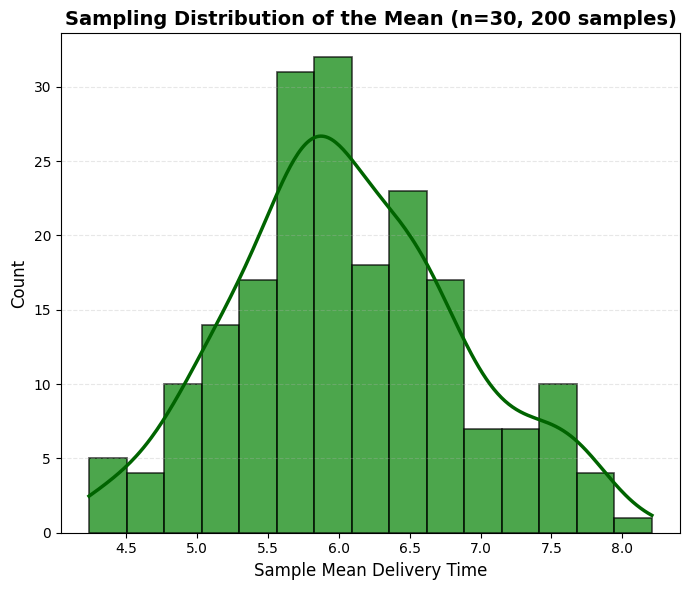


Central Limit Theorem Demonstration:
- The sampling distribution of the mean is approximately normal
- Centered around the population mean: 6.0447
- With reduced variability (standard error): 0.8009


In [9]:
# Create the plot
plt.figure(figsize=(7, 6))

# Plot histogram with KDE
plt.hist(sample_means, bins=15, density=False, alpha=0.7, color='green', 
         edgecolor='black', linewidth=1.2)

# Add KDE curve
from scipy.stats import gaussian_kde
kde = gaussian_kde(sample_means)
x_range = np.linspace(sample_means.min(), sample_means.max(), 300)
kde_values = kde(x_range)

# Scale KDE to match histogram count (not density)
kde_scaled = kde_values * len(sample_means) * (sample_means.max() - sample_means.min()) / 15

plt.plot(x_range, kde_scaled, color='darkgreen', linewidth=2.5, label='KDE')

# Formatting
plt.title(f'Sampling Distribution of the Mean (n={sample_size}, {num_samples} samples)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Sample Mean Delivery Time', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()

# Display the plot
plt.show()

print(f"\nCentral Limit Theorem Demonstration:")
print(f"- The sampling distribution of the mean is approximately normal")
print(f"- Centered around the population mean: {population_df['Delivery_Time_Hours'].mean():.4f}")
print(f"- With reduced variability (standard error): {sample_means.std():.4f}")